# Loan analysis continued

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
grouped_df = df.groupby(["grade", "homeownership"])["loan_amount"].sum().unstack()
grouped_df

homeownership,MORTGAGE,OWN,RENT
grade,,,
A,6972200,1343400,3176775
B,9081100,2056225,4655775
C,6925450,1383300,5005850
D,3216450,1329075,2718175
E,973275,190000,700025
F,237300,72900,136600
G,25000,20300,43750


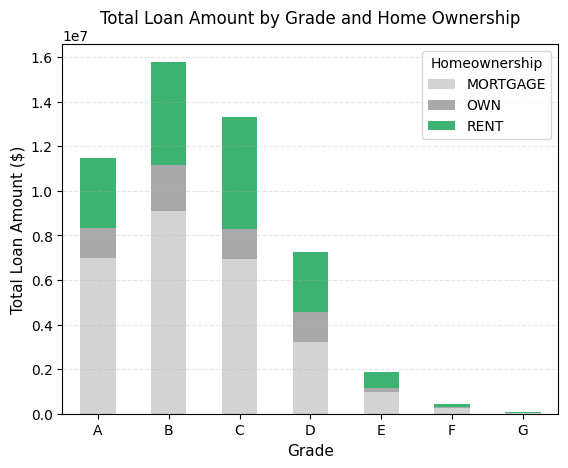

In [6]:
grouped_df.plot(kind="bar",
               stacked=True,
               color=["lightgray", "darkgray", "mediumseagreen"])

# Customize the plot
plt.title("Total Loan Amount by Grade and Home Ownership", fontsize=12, pad=15)
plt.xlabel("Grade", fontsize=11)
plt.ylabel("Total Loan Amount ($)", fontsize=11)

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Capitalize legend title
plt.legend(title="Homeownership")

plt.show()

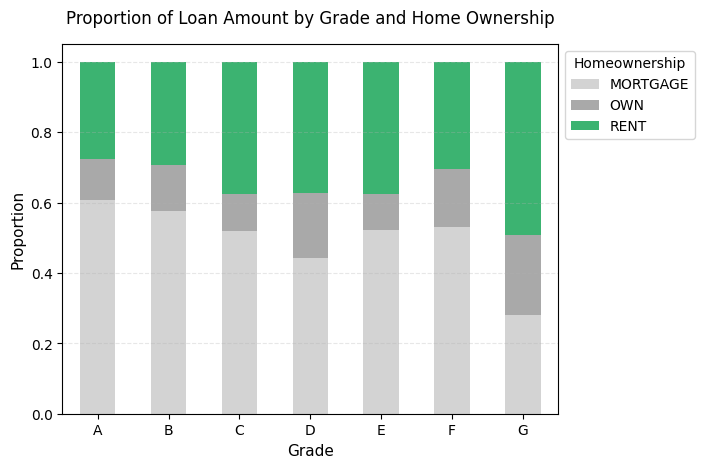

In [9]:
# Normalize the data to get proportions
proportion_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

# Plot the stacked bar chart with proportions
proportion_df.plot(kind="bar",
                   stacked=True,
                   color=["lightgray", "darkgray", "mediumseagreen"])

# Customize the plot
plt.title("Proportion of Loan Amount by Grade and Home Ownership", fontsize=12, pad=15)
plt.xlabel("Grade", fontsize=11)
plt.ylabel("Proportion", fontsize=11)

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Capitalize legend title
plt.legend(title="Homeownership", bbox_to_anchor=(1,1))

plt.savefig("chart_of_loans_by_grade_and_homeownership.png")

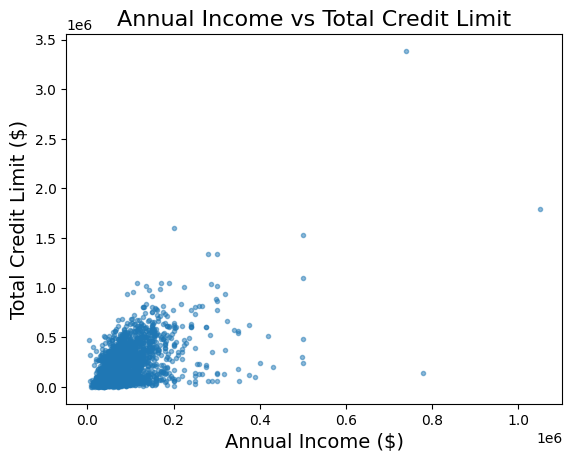

In [21]:
plt.scatter(df["annual_income"], df["total_credit_limit"], alpha=0.5, marker=".")
plt.title("Annual Income vs Total Credit Limit", fontsize=16)
plt.xlabel("Annual Income ($)", fontsize=14)
plt.ylabel("Total Credit Limit ($)", fontsize=14)
plt.show()

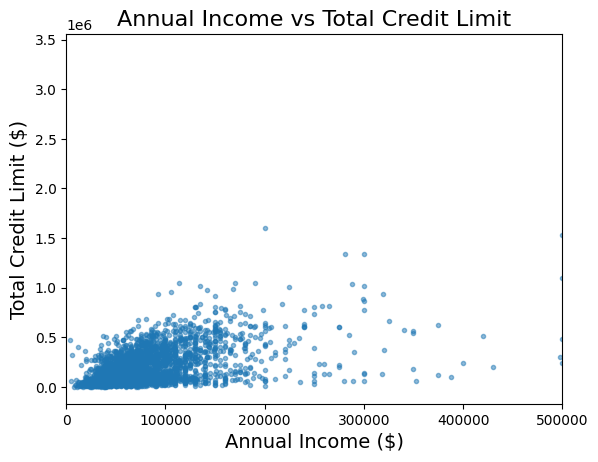

In [23]:
plt.scatter(df["annual_income"], df["total_credit_limit"], alpha=0.5, marker=".")
plt.title("Annual Income vs Total Credit Limit", fontsize=16)
plt.xlabel("Annual Income ($)", fontsize=14)
plt.ylabel("Total Credit Limit ($)", fontsize=14)
plt.xlim(0, 500000) # specify lower and upper bound
plt.show()

In [24]:
# visualize credit limits of customers in top 5% of distribution for income
# find top 5% of incomes
top_5_percent_income = df["annual_income"].quantile(0.95)
print(top_5_percent_income)

170000.0


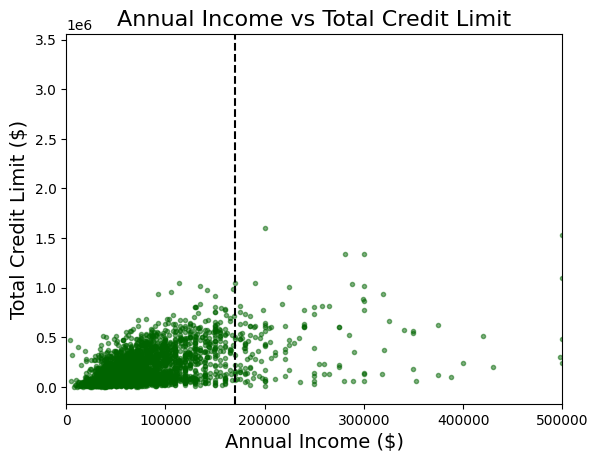

In [28]:
plt.scatter(df["annual_income"], df["total_credit_limit"], alpha=0.5, marker=".", color="darkgreen")
plt.title("Annual Income vs Total Credit Limit", fontsize=16)
plt.xlabel("Annual Income ($)", fontsize=14)
plt.ylabel("Total Credit Limit ($)", fontsize=14)
plt.xlim(0, 500000) # specify lower and upper bound
plt.axvline(x=top_5_percent_income, color="black", linestyle="--")
plt.show()